In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def savefigDF(ax, file_name):
    fig = ax.get_figure()
    fig.savefig(f'{file_name}.pdf', bbox_inches='tight')
    fig.savefig(f'{file_name}.svg', bbox_inches='tight')

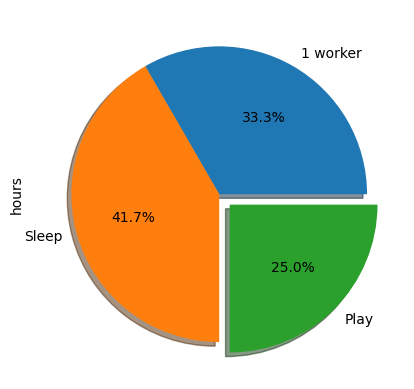

In [14]:
df = pd.DataFrame({'activity': ['Work', 'Sleep', 'Play'],
                   'hours': [8, 10, 6]})
df.set_index('activity', inplace=True)
ax = df.plot.pie(y='hours', title="Title", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

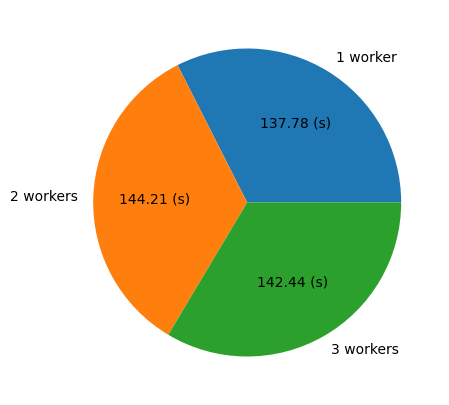

In [3]:
import pandas as pd

values = [137.77581, 144.21192, 142.44384]
df = pd.DataFrame({'Time (s)': [137.77581, 144.21192, 142.44384]},
                  index=['1 worker', '2 workers', '3 workers'])

ax = df.plot.pie(y='Time (s)', figsize=(5, 5),
                 autopct = lambda p : '{:,.2f} (s)'.format(p * sum(values)/100), 
                 legend = False,
                 labels = df.index)
ax.set_ylabel(None)
savefigDF(ax, '../pics/recommendation_system/different_number_worker')

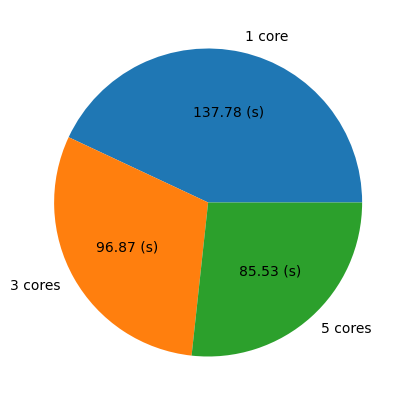

In [5]:
values = [137.77581, 96.87037, 85.52570]
df = pd.DataFrame({'Time (s)': [137.77581, 96.87037, 85.52570]},
                  index=['1 core', '3 cores', '5 cores'])

ax = df.plot.pie(y='Time (s)', figsize=(5, 5),
                 autopct = lambda p : '{:,.2f} (s)'.format(p * sum(values)/100), 
                 legend = False,
                 labels = df.index)
ax.set_ylabel(None)
savefigDF(ax, '../pics/recommendation_system/different_number_core')

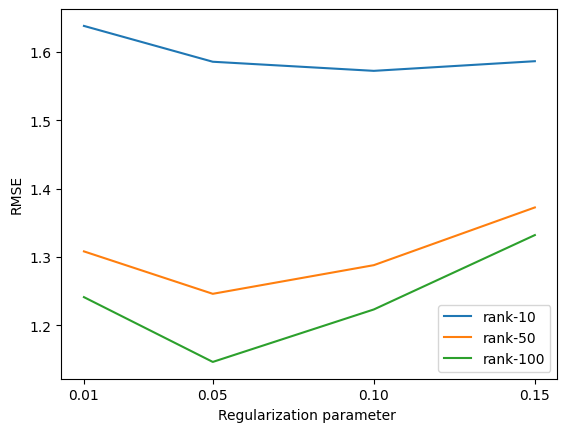

In [74]:
import json
df = dict()
range_regparam = [0.01, 0.05, 0.1, 0.15]
for rank in [10, 50, 100]:
    df[f'rank-{rank}'] = list()
    for regparam in range_regparam:
        with open(f"../result2/model/result/model_{rank}_{regparam}.json") as json_file:
            data = json.load(json_file)
            df[f'rank-{rank}'].append(data['rmse'])
df = pd.DataFrame(df, index = range_regparam)
ax = df.plot.line(xlabel = 'Regularization parameter ', ylabel = 'RMSE')
ax.set_xticks(range_regparam)
savefigDF(ax, '../pics/recommendation_system/als_tuning')